In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [384]:
df = pd.read_csv('weather_data.csv')

In [385]:
df.head()

,time,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,winddirection_10m,surface_pressure,cloudcover,dewpoint_2m,visibility,evapotranspiration,city
0,2026-01-25 00:00:00,7.5,0.1,83,14.3,137,991.2,100,4.8,22020.0,0.0,Edinburgh
1,2026-01-25 01:00:00,7.5,0.1,85,12.3,140,991.2,100,5.2,18500.0,0.0,Edinburgh
2,2026-01-25 02:00:00,7.7,0.0,84,11.7,137,991.2,96,5.2,19920.0,0.0,Edinburgh
3,2026-01-25 03:00:00,7.6,0.2,86,9.5,143,990.4,100,5.4,15940.0,0.0,Edinburgh
4,2026-01-25 04:00:00,7.5,0.2,87,10.7,130,990.8,100,5.5,13420.0,0.0,Edinburgh


In [386]:
df = df.rename(columns={'temperature_2m':'temperature','relativehumidity_2m': 'relative_humidity','windspeed_10m':'wind_speed','winddirection_10m':'wind_direction'})

In [387]:
df.shape

(174720, 12)

In [388]:
df.isna().sum()

time                  0
temperature           0
precipitation         0
relative_humidity     0
wind_speed            0
wind_direction        0
surface_pressure      0
cloudcover            0
dewpoint_2m           0
visibility            0
evapotranspiration    0
city                  0
dtype: int64

In [389]:
df.duplicated().sum()

np.int64(0)

In [390]:
df.describe()

,temperature,precipitation,relative_humidity,wind_speed,wind_direction,surface_pressure,cloudcover,dewpoint_2m,visibility,evapotranspiration
count,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.0
mean,6.230357,0.095119,86.464286,8.786905,146.011905,989.670238,83.970238,4.096429,19922.827381,0.0
std,1.586959,0.234793,6.524599,4.437442,59.389522,5.149536,27.309684,1.182308,9833.078529,0.0
min,2.400000,0.000000,65.000000,0.700000,45.000000,980.200000,0.000000,1.500000,3480.000000,0.0
25%,5.000000,0.000000,83.000000,5.075000,106.500000,985.000000,82.750000,3.100000,12815.000000,0.0
50%,6.500000,0.000000,87.000000,8.250000,128.500000,990.350000,99.000000,4.200000,19510.000000,0.0
75%,7.325000,0.100000,93.000000,11.800000,195.000000,992.400000,100.000000,5.000000,24140.000000,0.0
max,9.800000,1.400000,96.000000,23.900000,283.000000,1000.400000,100.000000,7.100000,56660.000000,0.0


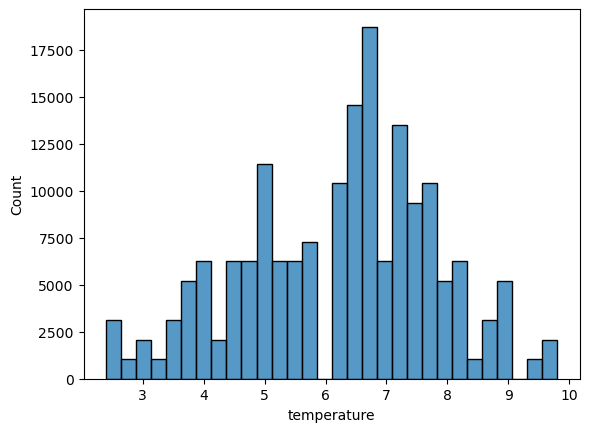

In [391]:
sns.histplot(df['temperature'], bins = 30)
plt.show()

In [392]:
df.head()

,time,temperature,precipitation,relative_humidity,wind_speed,wind_direction,surface_pressure,cloudcover,dewpoint_2m,visibility,evapotranspiration,city
0,2026-01-25 00:00:00,7.5,0.1,83,14.3,137,991.2,100,4.8,22020.0,0.0,Edinburgh
1,2026-01-25 01:00:00,7.5,0.1,85,12.3,140,991.2,100,5.2,18500.0,0.0,Edinburgh
2,2026-01-25 02:00:00,7.7,0.0,84,11.7,137,991.2,96,5.2,19920.0,0.0,Edinburgh
3,2026-01-25 03:00:00,7.6,0.2,86,9.5,143,990.4,100,5.4,15940.0,0.0,Edinburgh
4,2026-01-25 04:00:00,7.5,0.2,87,10.7,130,990.8,100,5.5,13420.0,0.0,Edinburgh


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174720 entries, 0 to 174719
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time                174720 non-null  object 
 1   temperature         174720 non-null  float64
 2   precipitation       174720 non-null  float64
 3   relative_humidity   174720 non-null  int64  
 4   wind_speed          174720 non-null  float64
 5   wind_direction      174720 non-null  int64  
 6   surface_pressure    174720 non-null  float64
 7   cloudcover          174720 non-null  int64  
 8   dewpoint_2m         174720 non-null  float64
 9   visibility          174720 non-null  float64
 10  evapotranspiration  174720 non-null  float64
 11  city                174720 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 16.0+ MB


In [394]:
df['time']=pd.to_datetime(df['time'])

In [395]:
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month

In [396]:
df.drop('evapotranspiration',axis=1)

,time,temperature,precipitation,relative_humidity,wind_speed,wind_direction,surface_pressure,cloudcover,dewpoint_2m,visibility,city,hour,day,month
0,2026-01-25 00:00:00,7.5,0.1,83,14.3,137,991.2,100,4.8,22020.0,Edinburgh,0,25,1
1,2026-01-25 01:00:00,7.5,0.1,85,12.3,140,991.2,100,5.2,18500.0,Edinburgh,1,25,1
2,2026-01-25 02:00:00,7.7,0.0,84,11.7,137,991.2,96,5.2,19920.0,Edinburgh,2,25,1
3,2026-01-25 03:00:00,7.6,0.2,86,9.5,143,990.4,100,5.4,15940.0,Edinburgh,3,25,1
4,2026-01-25 04:00:00,7.5,0.2,87,10.7,130,990.8,100,5.5,13420.0,Edinburgh,4,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174715,2006-03-04 19:00:00,5.6,0.0,92,5.4,233,993.7,67,4.4,24140.0,Edinburgh,19,4,3
174716,2006-03-04 20:00:00,5.0,0.0,93,5.6,230,994.2,33,4.0,24140.0,Edinburgh,20,4,3
174717,2006-03-04 21:00:00,4.5,0.0,93,5.6,225,994.6,0,3.4,24140.0,Edinburgh,21,4,3
174718,2006-03-04 22:00:00,4.0,0.0,93,5.1,219,994.9,13,3.0,24140.0,Edinburgh,22,4,3


In [397]:
df['relative_humidity_lag'] = df['relative_humidity'].shift(-72)
df['surface_pressure_lag'] = df['surface_pressure'].shift(-72)
df['wind_direction_lag'] = df['wind_direction'].shift(-72)
df['wind_speed_lag'] = df['wind_speed'].shift(-72)
df['dewpoint_2m_lag'] = df['dewpoint_2m'].shift(-72)
df['evapotranspiration_lag'] = df['evapotranspiration'].shift(-72)
df['visibility_lag'] = df['visibility'].shift(-72)
df['cloudcover_lag'] = df['cloudcover'].shift(-72)
df['precipitation_lag'] = df['precipitation'].shift(-72)

df = df.dropna()

In [398]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [399]:
y = df['temperature']
x = df.drop(columns=['temperature','time', 'hour','day','month','precipitation','relative_humidity','surface_pressure','wind_direction','dewpoint_2m','wind_speed','evapotranspiration','visibility','cloudcover','city','evapotranspiration'])

In [400]:
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [401]:
x.columns

Index(['relative_humidity_lag', 'surface_pressure_lag', 'wind_direction_lag',
       'wind_speed_lag', 'dewpoint_2m_lag', 'evapotranspiration_lag',
       'visibility_lag', 'cloudcover_lag', 'precipitation_lag'],
      dtype='object')

In [402]:
train_len = int(0.8 * len(df))
val_len = int(0.9 * len(df))

print(train_len)
print(val_len)
print(len(df))
x_train = x[:train_len]
y_train = y[:train_len]
x_val = x[train_len : val_len]
y_val = y[train_len : val_len]
x_test = x[val_len: ]
y_test = y[val_len: ]

139718
157183
174648


In [403]:
num_cols = x.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = x.select_dtypes(include=['object']).columns.tolist()

In [404]:
preprocessor = ColumnTransformer([('num',StandardScaler(),num_cols),('cat',OneHotEncoder(),cat_cols)])
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)
x_val_transformed = preprocessor.transform(x_val)

In [405]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import recall_score, precision_score,accuracy_score, mean_squared_error, r2_score

In [406]:
x_train_transformed = x_train_transformed.toarray() if hasattr(x_train_transformed, "toarray") else x_train_transformed
x_test_transformed = x_test_transformed.toarray() if hasattr(x_test_transformed, "toarray") else x_test_transformed
x_val_transformed = x_val_transformed.toarray() if hasattr(x_test_transformed, "toarray") else x_val_transformed

In [407]:
if x_train_transformed.ndim == 1:
    x_train_transformed = x_train_transformed.reshape(-1, 1)
    x_test_transformed = x_test_transformed.reshape(-1, 1)

<Axes: >

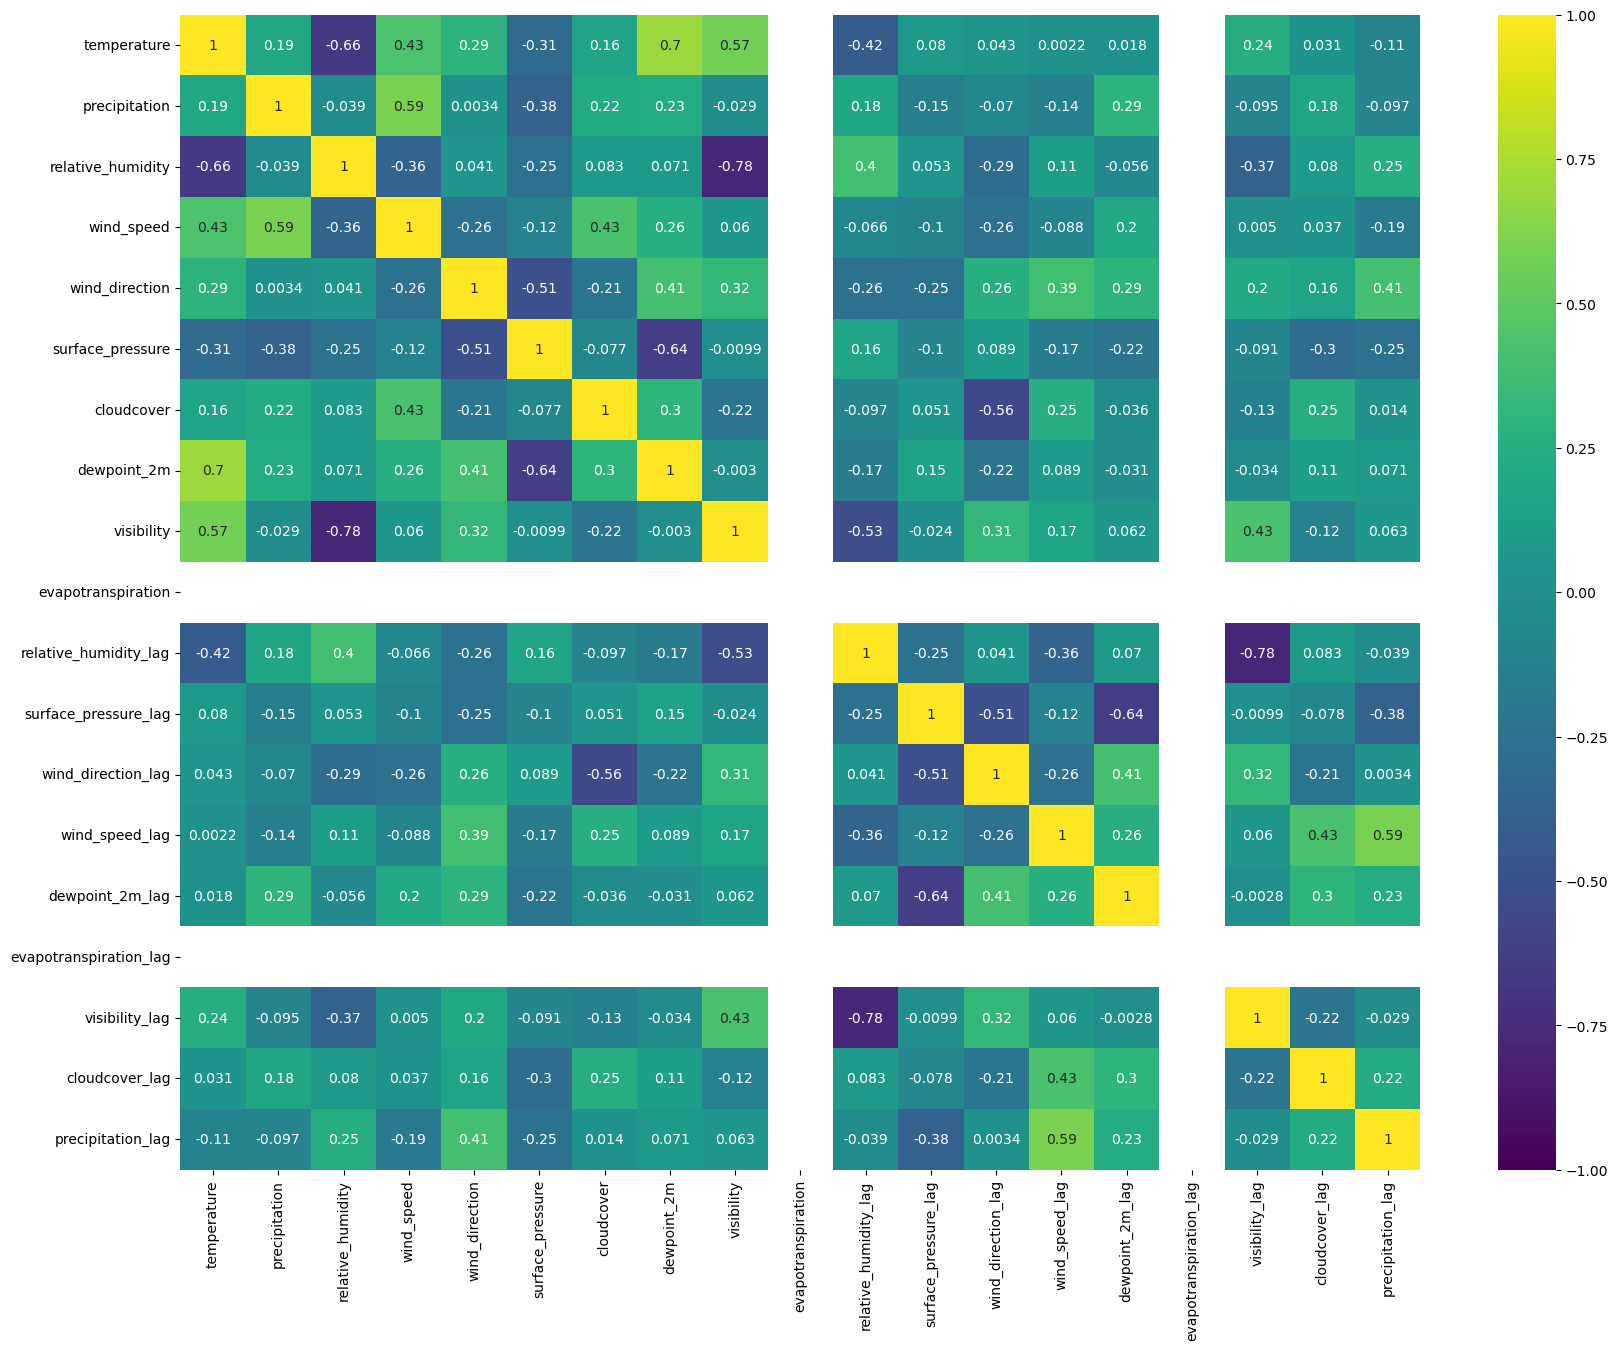

In [408]:
plt.figure(figsize=(20,15))
num_col = df.select_dtypes(include=['float64','int64'])
cor_matrix = num_col.corr()
sns.heatmap(cor_matrix,vmin=-1,vmax=1,cmap='viridis',annot=True)

In [409]:
reg_model = LinearRegression()
reg_model.fit(x_train_transformed,y_train)
y_pred = reg_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

0.32966646781071507 1.6873967497736886


In [410]:
rid_model = Ridge(alpha=10,tol=0.001,solver='auto')
rid_model.fit(x_train_transformed,y_train)
y_pred = rid_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

0.3296662816064353 1.687397218496319


not linear

In [411]:
rf_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=15, min_samples_split=5, min_samples_leaf=1, max_features='sqrt')
rf_model.fit(x_train_transformed,y_train)
y_pred = rf_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

0.9999981221074596 4.727124061116212e-06


In [412]:
lg_model = LGBMRegressor(boosting_type='gbdt',learning_rate=0.1, n_estimators=200)
lg_model.fit(x_train_transformed,y_train)
y_pred = lg_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 139718, number of used features: 8
[LightGBM] [Info] Start training from score 6.230237


c:\Users\cathy\anaconda3\envs\'musicenv'\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


0.9999999966692567 8.384311958199848e-09


In [413]:
xg_model = XGBRegressor(learning_rate=0.4,min_split_loss=4)
xg_model.fit(x_train_transformed,y_train)
y_pred = xg_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

0.9988992131060083 0.0027709552602101575


In [414]:
results_df = pd.DataFrame({'Actual': y_val,
    'Predicted': y_pred})
results_df = results_df.reset_index(drop=True)
print(results_df.head(10))
results_df['diff'] = results_df['Actual'] - results_df['Predicted']

   Actual  Predicted
0     8.0   7.945261
1     7.9   7.927656
2     7.6   7.581733
3     7.1   7.067231
4     6.7   6.651445
5     6.5   6.620028
6     6.5   6.510413
7     6.5   6.466481
8     6.6   6.633154
9     6.8   6.747649


In [415]:
results_df['diff'].max()

0.20334787368774432

                  Feature  Importance
0   relative_humidity_lag    0.185164
6          visibility_lag    0.159610
2      wind_direction_lag    0.157743
1    surface_pressure_lag    0.154063
4         dewpoint_2m_lag    0.145574
3          wind_speed_lag    0.135641
7          cloudcover_lag    0.040545
8       precipitation_lag    0.021660
5  evapotranspiration_lag    0.000000


C:\Users\cathy\AppData\Local\Temp\ipykernel_78048\1335702550.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


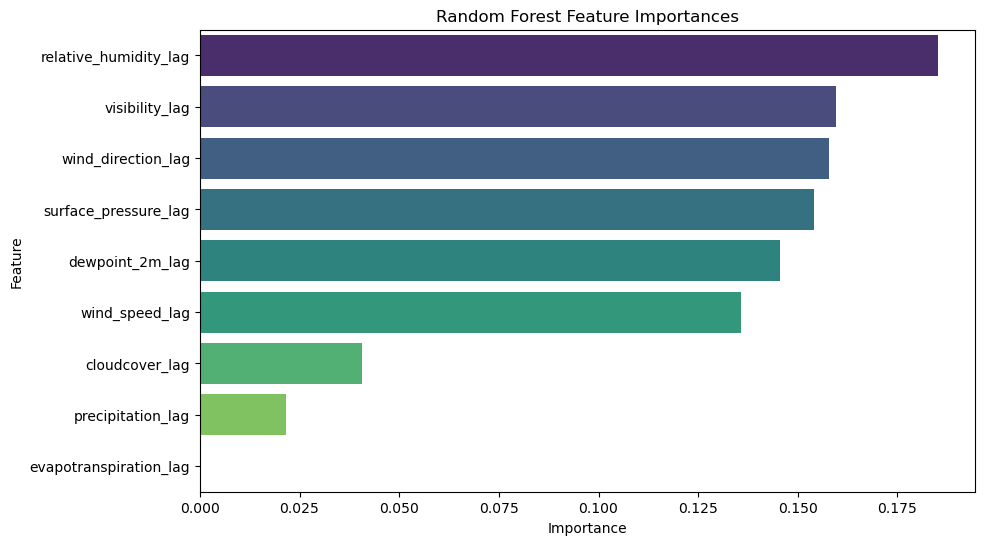

In [416]:
feature_names = x_train.columns 
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feat_imp_df)
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importances')
plt.show()

In [417]:
!pip install statsmodels

In [418]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
df["time"] = pd.to_datetime(df["time"])
df = df.sort_values("time")
df.set_index("time", inplace=True)

Y = df["temperature"]   


In [ ]:
train = Y.iloc[:-96]   # last 96 hours as test
test  = Y.iloc[-96:]


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(1,1,1,24)
)

sarima_fit = sarima.fit()

print(results.summary())

SyntaxError: invalid syntax. Perhaps you forgot a comma? (229135662.py, line 4)

In [ ]:
forecast = results.forecast(steps=24)


NameError: name 'results' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("ARIMA MSE:", mean_squared_error(test, arima_pred))
print("SARIMA MSE:", mean_squared_error(test, sarima_pred))


In [ ]:
plt.figure()
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.show()